We explicitly specify to use Tensorflow 1.x in case it is not compatible with future version, such as the coming 2.x version.


In [0]:
%tensorflow_version 1.x

Given, $x$, $y$, following code is to search for $A$ so that $y \leftarrow A \cdot x $, i.e. solve the equation $ y = A \cdot x$.




Step # 5, A = [[2.1908906]]
Loss = 60.367156982421875
Step # 10, A = [[3.6057742]]
Loss = 41.78626251220703
Step # 15, A = [[4.7821484]]
Loss = 25.524715423583984
Step # 20, A = [[5.7382216]]
Loss = 18.02544403076172
Step # 25, A = [[6.5133834]]
Loss = 11.504247665405273
Step # 30, A = [[7.1372056]]
Loss = 8.244590759277344
Step # 35, A = [[7.662651]]
Loss = 6.190857887268066
Step # 40, A = [[8.073411]]
Loss = 4.405425548553467
Step # 45, A = [[8.417829]]
Loss = 3.2698397636413574
Step # 50, A = [[8.688317]]
Loss = 1.6229454278945923
Step # 55, A = [[8.9051075]]
Loss = 1.813165307044983
Step # 60, A = [[9.093764]]
Loss = 1.1460050344467163
Step # 65, A = [[9.235938]]
Loss = 1.147708535194397
Step # 70, A = [[9.357454]]
Loss = 1.7275326251983643
Step # 75, A = [[9.465937]]
Loss = 0.7693750262260437
Step # 80, A = [[9.539473]]
Loss = 0.8462035059928894
Step # 85, A = [[9.589081]]
Loss = 1.0846935510635376
Step # 90, A = [[9.630781]]
Loss = 0.6467625498771667
Step # 95, A = [[9.6776905]]


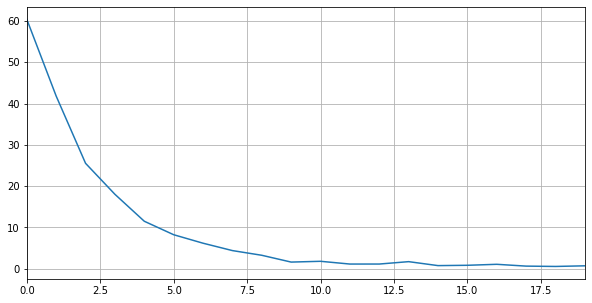

In [26]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import tensorflow as tf

batch_size = 20
x_vals = np.random.normal( 1, 0.1, 100 )
y_vals = np.repeat( 10., 100 )
x_data = tf.placeholder( shape = [ None, 1 ], dtype = tf.float32 )
y_target = tf.placeholder( shape = [ None, 1 ], dtype = tf.float32 )
A = tf.Variable( tf.random_normal( shape = [1,1] ) )
my_output = tf.matmul( x_data, A )
loss = tf.reduce_mean( tf.square( my_output - y_target ) )
my_opt = tf.train.GradientDescentOptimizer( 0.02 )
train_step = my_opt.minimize( loss )

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run( init )

loss_batch = []
for i in range( 100 ):
  rand_index = np.random.choice( 100, size = batch_size )
  rand_x = np.transpose( [ x_vals[ rand_index ] ] )
  rand_y = np.transpose( [ y_vals[ rand_index ] ] )
  sess.run( train_step, feed_dict = {x_data: rand_x, y_target: rand_y })
  if (i + 1)%5 == 0:
    print( 'Step # {}, A = {}'.format( i + 1, sess.run( A ) ) )
    temp_loss = sess.run( loss, feed_dict = {x_data: rand_x, y_target: rand_y } )
    print( 'Loss = {}'.format( temp_loss ) )
    loss_batch.append( temp_loss )

sess.close()

pd.Series( loss_batch, index = list( range(20)) ).plot( figsize=(10,5), grid = True )

